<a href="https://colab.research.google.com/github/Harshitha14-05/PersonalCareProduct/blob/main/personalCareProduct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/indian_summer_beauty_products.csv")
df.head()

,Product_ID,Product_Name,Category,Brand,Average_Price,SPF_Rating,Skin_Type,Hair_Type,Age_Group,Gender,Popularity_Rating,Usage_Frequency,Primary_Ingredient,Fragrance_Type,Waterproof,Organic,Paraben_Free,Summer_Essential_Score,Region_Usage,Online_Availability
0,P00001,Sunscreen,Bodycare,Ponds,439.70,15,Normal,NaN,Teen,Male,1,Occasional,Charcoal,Floral,No,Yes,No,2,Pan-India,Myntra
1,P00002,Lip Balm,Bodycare,Dove,178.55,30,Normal,Wavy,Teen,Female,4,Weekly,Coconut Oil,Floral,No,Yes,No,7,East,Flipkart
2,P00003,Lip Balm,Skincare,Ponds,600.27,50,Oily,Coily,Senior,Female,3,Weekly,Vitamin C,Citrus,Yes,Yes,Yes,5,North,Nykaa
3,P00004,Body Lotion,Skincare,L'Oréal,749.37,0,Dry,Coily,Adult,Unisex,4,Daily,Tea Tree,Citrus,Yes,Yes,Yes,6,Pan-India,Myntra
4,P00005,Toner,Makeup,Biotique,1331.89,30,Oily,NaN,Teen,Female,2,Daily,Aloe Vera,Fruity,No,Yes,Yes,5,West,Nykaa


In [3]:
df.shape

(10000, 20)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Average_Price,10000.0,774.110514,415.997772,50.11,420.3725,773.525,1129.3375,1499.92
SPF_Rating,10000.0,23.688500,18.489501,0.00,0.0000,15.000,30.0000,50.00
Popularity_Rating,10000.0,3.035400,1.409591,1.00,2.0000,3.000,4.0000,5.00
Summer_Essential_Score,10000.0,5.517200,2.867425,1.00,3.0000,6.000,8.0000,10.00


In [5]:
df.columns

Index(['Product_ID', 'Product_Name', 'Category', 'Brand', 'Average_Price',
       'SPF_Rating', 'Skin_Type', 'Hair_Type', 'Age_Group', 'Gender',
       'Popularity_Rating', 'Usage_Frequency', 'Primary_Ingredient',
       'Fragrance_Type', 'Waterproof', 'Organic', 'Paraben_Free',
       'Summer_Essential_Score', 'Region_Usage', 'Online_Availability'],
      dtype='object')

In [6]:
# Top 5 most popular products
top_popular = df.groupby('Product_Name')['Popularity_Rating'].mean().sort_values(ascending=False).head(5)
print("Top 5 Popular Products:\n", top_popular)

Top 5 Popular Products:
 Product_Name
Moisturizer    3.086042
Toner          3.066155
Deodorant      3.064485
Sunscreen      3.057674
Face Wash      3.036327
Name: Popularity_Rating, dtype: float64


In [7]:
# Top 5 most popular brands
top_popular_brands = df.groupby('Brand')['Popularity_Rating'].mean().sort_values(ascending=False).head(5)
print("Top 5 Popular Brands:\n", top_popular_brands)

Top 5 Popular Brands:
 Brand
L'Oréal     3.092537
Biotique    3.088296
Lakmé       3.048571
Himalaya    3.034615
Ponds       3.028000
Name: Popularity_Rating, dtype: float64


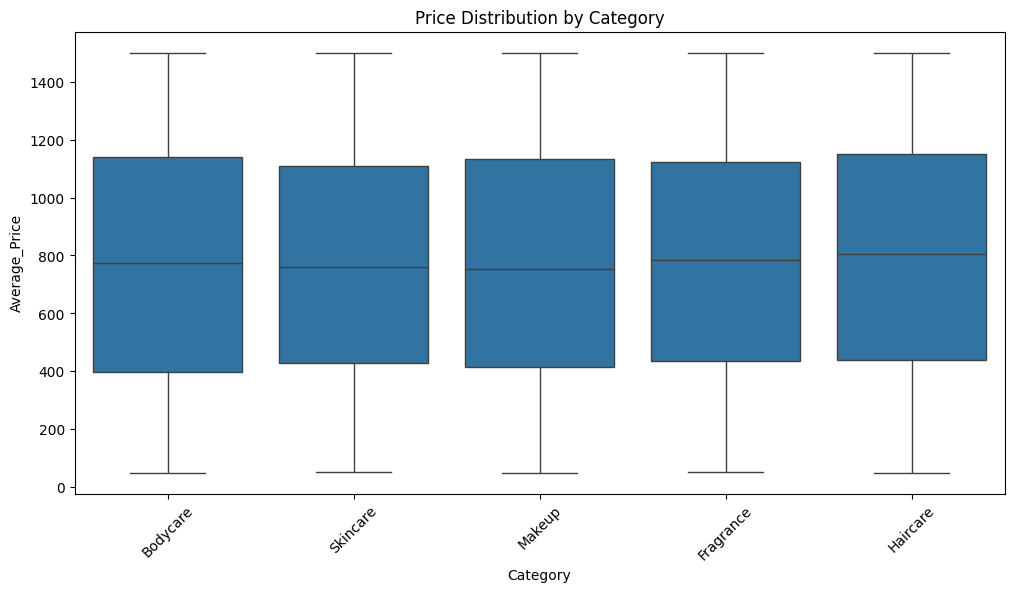

In [8]:
# Price distribution by category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Average_Price', data=df)
plt.xticks(rotation=45)
plt.title('Price Distribution by Category')
plt.show()

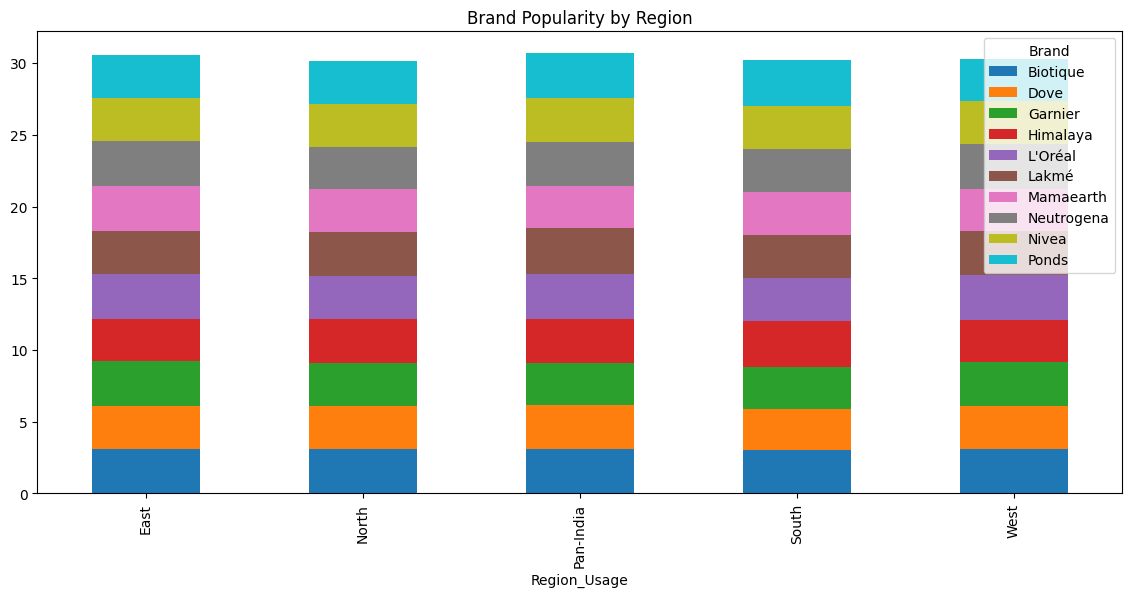

In [9]:
# Popular brands by region
region_brand = df.groupby(['Region_Usage', 'Brand'])['Popularity_Rating'].mean().unstack()
region_brand.plot(kind='bar', figsize=(14, 6), stacked=True)
plt.title("Brand Popularity by Region")
plt.show()

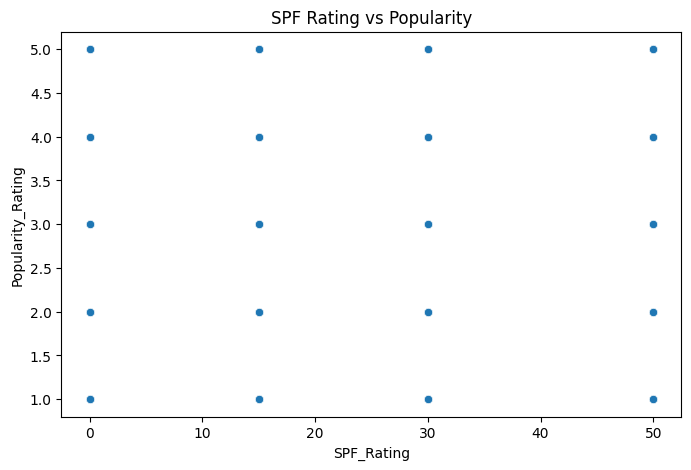

In [10]:
# SPF Rating vs. Popularity
plt.figure(figsize=(8, 5))
sns.scatterplot(x='SPF_Rating', y='Popularity_Rating', data=df)
plt.title('SPF Rating vs Popularity')
plt.show()

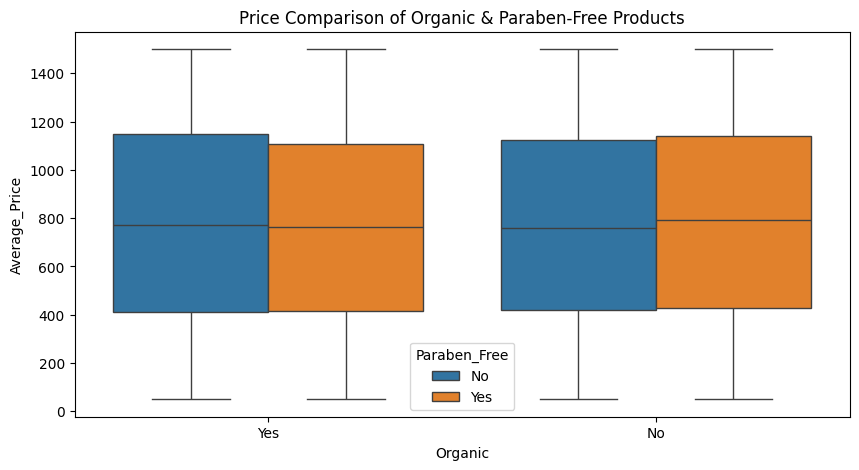

In [11]:
# Organic vs. Paraben-Free pricing
plt.figure(figsize=(10, 5))
sns.boxplot(x='Organic', y='Average_Price', hue='Paraben_Free', data=df)
plt.title('Price Comparison of Organic & Paraben-Free Products')
plt.show()

<ipython-input-12-92cec9e8293c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Average_Price', data=df, palette="viridis", estimator=sum)


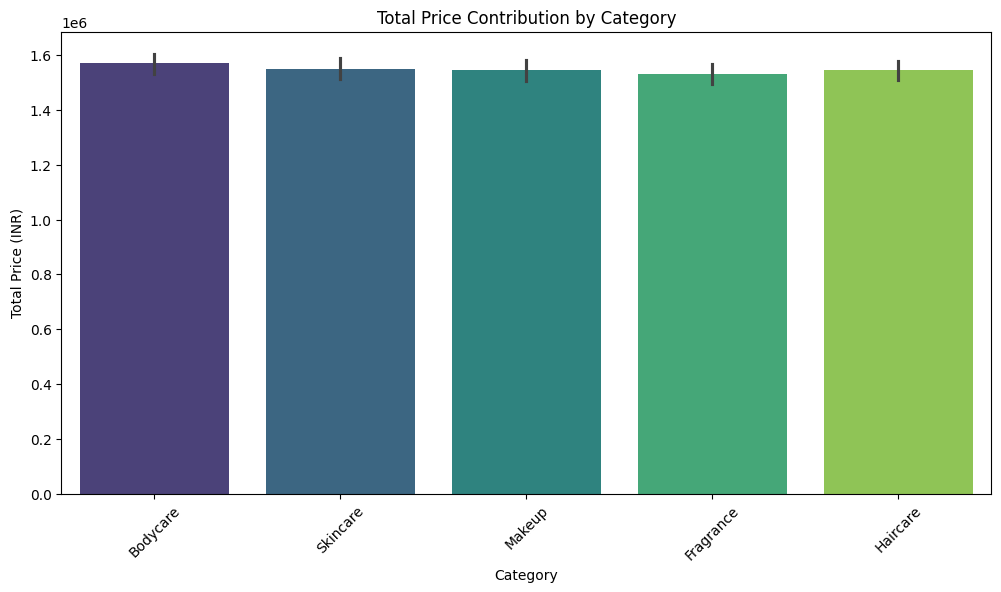

In [12]:
# Average Price by Category
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Average_Price', data=df, palette="viridis", estimator=sum)
plt.xticks(rotation=45)
plt.title('Total Price Contribution by Category')
plt.xlabel('Category')
plt.ylabel('Total Price (INR)')
plt.show()

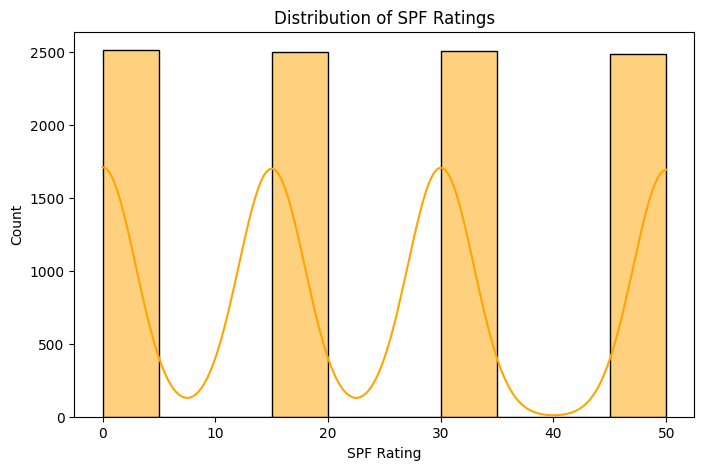

In [13]:
#Distribution of SPF Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['SPF_Rating'].dropna(), bins=10, kde=True, color='orange')
plt.title('Distribution of SPF Ratings')
plt.xlabel('SPF Rating')
plt.ylabel('Count')
plt.show()

<ipython-input-14-e6e67fab440f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette="Set2")


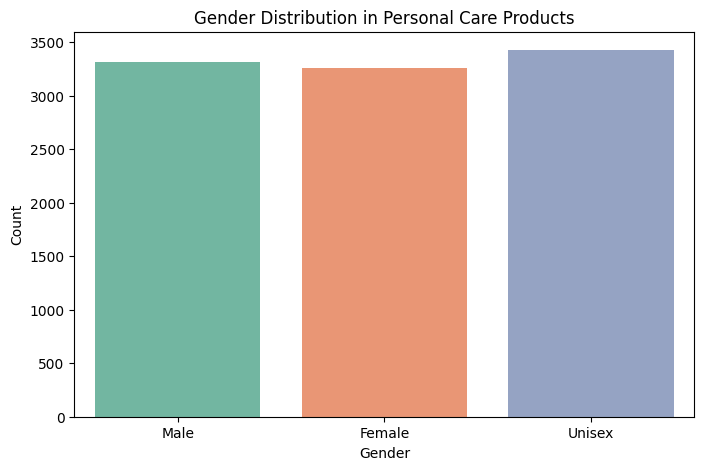

In [14]:
# Gender Preference for Personal Care Products
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df, palette="Set2")
plt.title('Gender Distribution in Personal Care Products')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

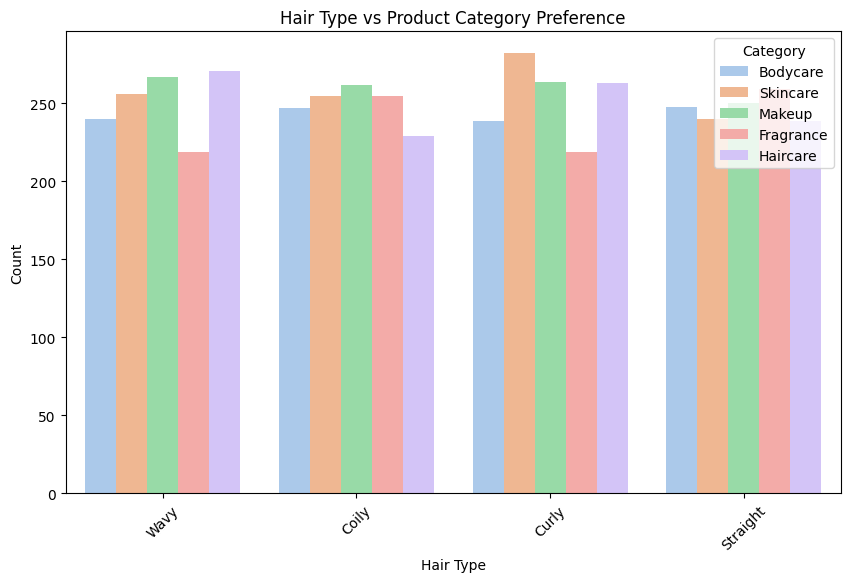

In [15]:
# Hair Type vs Product Preference
plt.figure(figsize=(10, 6))
sns.countplot(x='Hair_Type', hue='Category', data=df, palette="pastel")
plt.xticks(rotation=45)
plt.title('Hair Type vs Product Category Preference')
plt.xlabel('Hair Type')
plt.ylabel('Count')
plt.legend(title='Category')
plt.show()

<ipython-input-16-73bb90348e86>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Summer_Essential_Score', data=df, palette="coolwarm")


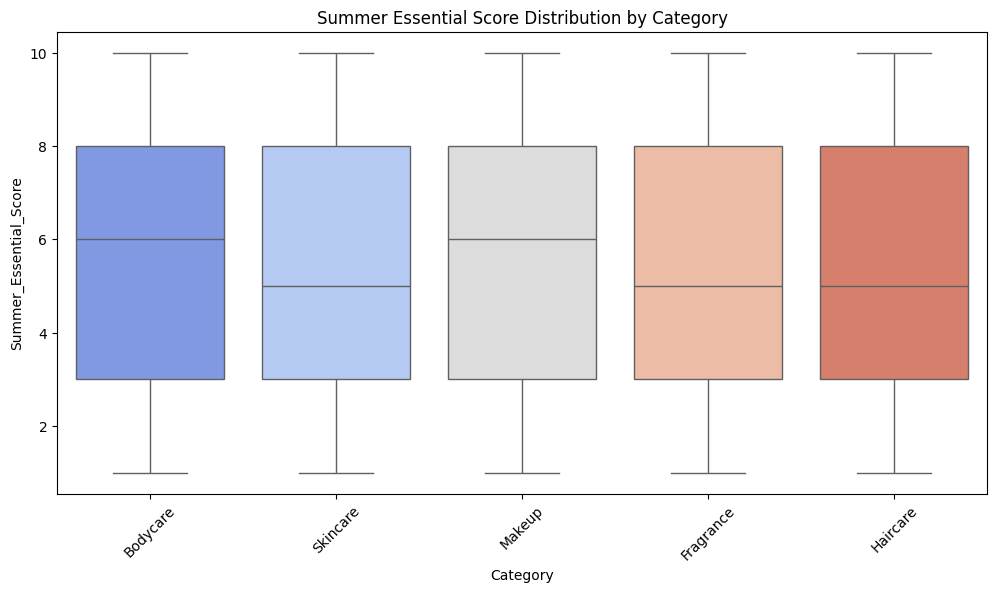

In [16]:
# Summer Essential Score by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Summer_Essential_Score', data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title('Summer Essential Score Distribution by Category')
plt.show()

<ipython-input-17-82e0d3c27781>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Fragrance_Type', data=df, palette="magma", order=df['Fragrance_Type'].value_counts().index)


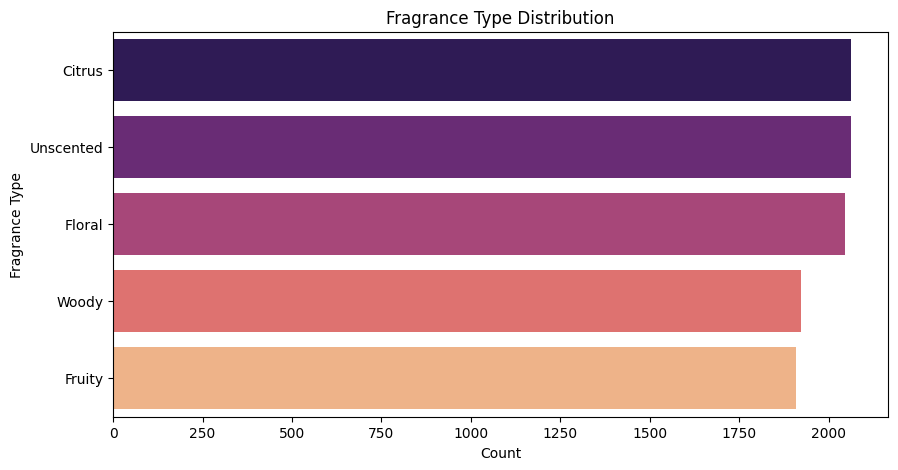

In [17]:

# Fragrance Type Distribution
plt.figure(figsize=(10, 5))
sns.countplot(y='Fragrance_Type', data=df, palette="magma", order=df['Fragrance_Type'].value_counts().index)
plt.title('Fragrance Type Distribution')
plt.ylabel('Fragrance Type')
plt.xlabel('Count')
plt.show()

<ipython-input-18-e231a2adaeae>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Online_Availability', data=df, palette="cividis", order=df['Online_Availability'].value_counts().index)


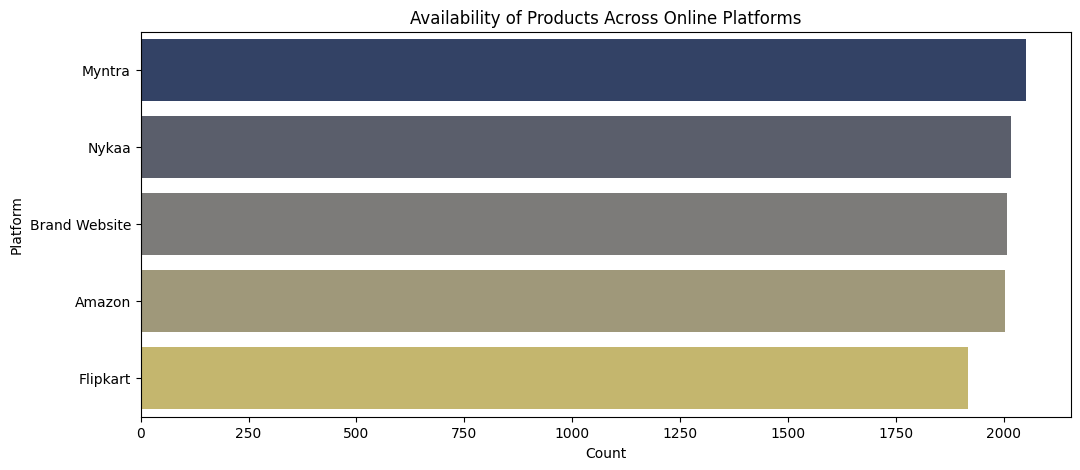

In [18]:
# Online Availability Distribution
plt.figure(figsize=(12, 5))
sns.countplot(y='Online_Availability', data=df, palette="cividis", order=df['Online_Availability'].value_counts().index)
plt.title('Availability of Products Across Online Platforms')
plt.ylabel('Platform')
plt.xlabel('Count')
plt.show()

<ipython-input-19-8cc323298327>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Usage_Frequency', y='Popularity_Rating', data=df, palette="PuBuGn")


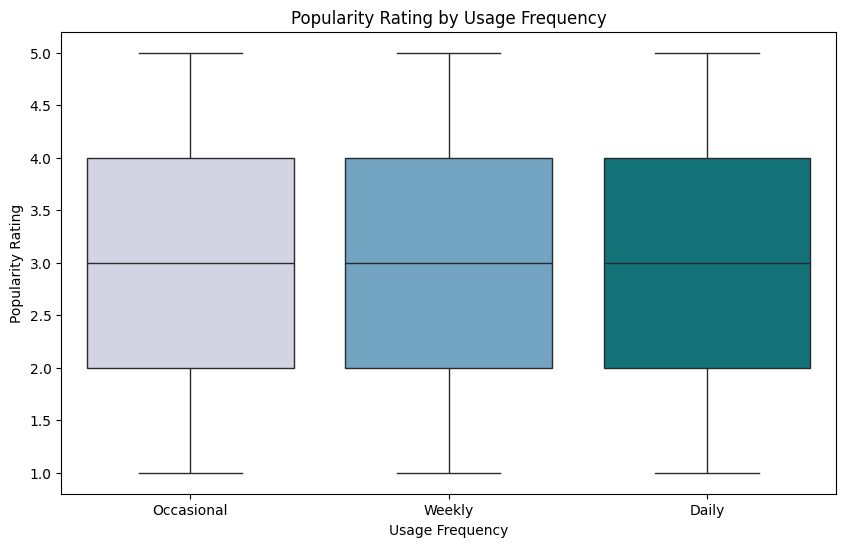

In [19]:
#Popularity Rating vs. Usage Frequency
plt.figure(figsize=(10, 6))
sns.boxplot(x='Usage_Frequency', y='Popularity_Rating', data=df, palette="PuBuGn")
plt.title('Popularity Rating by Usage Frequency')
plt.xlabel('Usage Frequency')
plt.ylabel('Popularity Rating')
plt.show()